In [ ]:
import pandas as pd
import numpy as np
import joblib  # For saving/loading models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
import pandas as pd

df = pd.read_csv('/content/swiggy.csv')
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [ ]:
# Check for missing values
df.isnull().sum()

,0
ID,0
Area,0
City,0
Restaurant,0
Price,0
Avg ratings,0
Total ratings,0
Food type,0
Address,0
Delivery time,0


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

0

In [ ]:
# Check column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [ ]:
# Compute top 10 food types
top_10_food_counts = df['Food type'].str.split(',').explode().value_counts().head(10).reset_index()
top_10_food_counts.columns = ['Food Type', 'Count']

# Display the top 10 food types
print(top_10_food_counts)


      Food Type  Count
0       Chinese   2588
1  North Indian   1921
2        Indian   1772
3     Fast Food   1550
4     Beverages   1524
5      Desserts   1436
6       Biryani   1079
7        Snacks   1013
8  South Indian    857
9   Continental    686


In [ ]:
# Display min and max values of Price and Avg Ratings
min_price = df['Price'].min()
max_price = df['Price'].max()

min_rating = df['Avg ratings'].min()
max_rating = df['Avg ratings'].max()

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Minimum Rating: {min_rating}")
print(f"Maximum Rating: {max_rating}")


Minimum Price: 0.0
Maximum Price: 2500.0
Minimum Rating: 2.0
Maximum Rating: 5.0


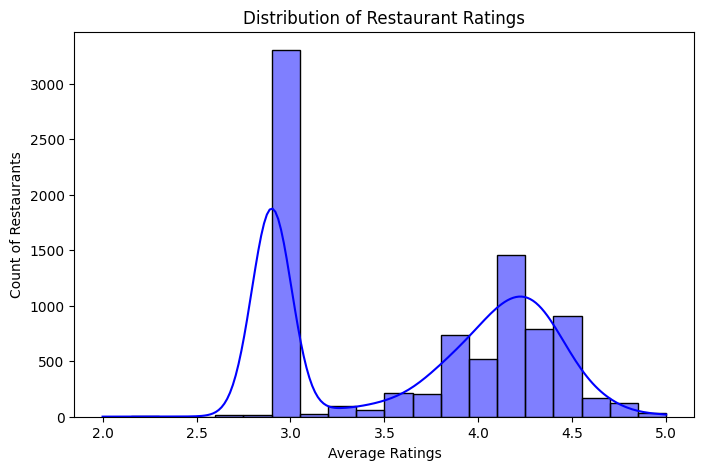

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Avg ratings"], bins=20, kde=True, color="blue")
plt.xlabel("Average Ratings")
plt.ylabel("Count of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()


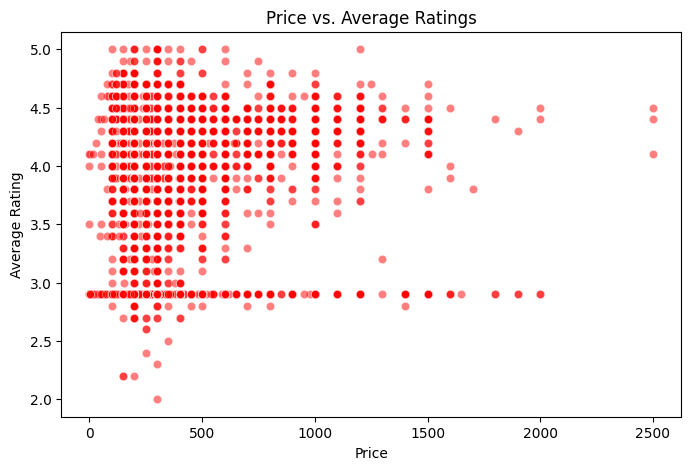

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Price"], y=df["Avg ratings"], alpha=0.5, color="red")
plt.xlabel("Price")
plt.ylabel("Average Rating")
plt.title("Price vs. Average Ratings")
plt.show()


<ipython-input-27-8b30dd0a94fe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="coolwarm")


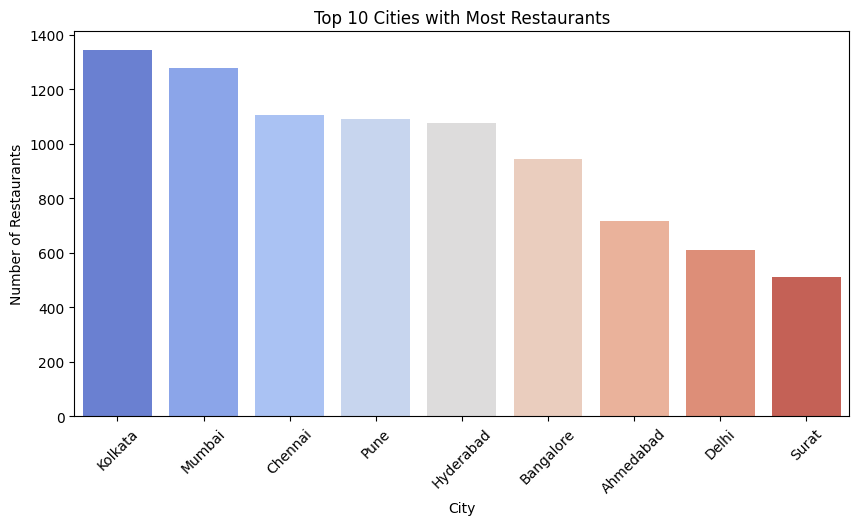

In [ ]:
city_counts = df["City"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Cities with Most Restaurants")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming `df` is your dataset

# Normalize numerical features like 'Price', 'Avg ratings', 'Delivery time'
scaler = StandardScaler()
df[['Price', 'Avg ratings', 'Delivery time']] = scaler.fit_transform(df[['Price', 'Avg ratings', 'Delivery time']])


In [ ]:
# Compute top 10 food types (if not already done)
top_10_food_counts = df['Food type'].str.split(',').explode().value_counts().head(10).reset_index()
top_10_food_counts.columns = ['food type', 'count']

# Function to combine features into one vector
def combine_features(row):
    # Combine Food type (as bag-of-words), Price, and Avg ratings into a vector
    food_type_vector = [1 if ft in row['Food type'] else 0 for ft in top_10_food_counts['food type']]
    numerical_features = [row['Price'], row['Avg ratings']]
    return np.concatenate([food_type_vector, numerical_features])

# Apply the function to the DataFrame to create feature vectors
df['features'] = df.apply(combine_features, axis=1)

# Cosine Similarity on combined feature vector
from sklearn.metrics.pairwise import cosine_similarity

# Generate cosine similarity matrix using combined features
cosine_sim_enhanced = cosine_similarity(list(df['features']))

# Function to get similar restaurants based on enhanced model
def get_similar_restaurants_enhanced(restaurant_name, top_n=5):
    idx = df[df['Restaurant'] == restaurant_name].index[0]
    sim_scores = list(enumerate(cosine_sim_enhanced[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Skip the restaurant itself
    restaurant_indices = [i[0] for i in sim_scores]

    similar_restaurants = df.iloc[restaurant_indices][['Restaurant', 'Food type']]
    return similar_restaurants

# Test the enhanced model
similar_restaurants_enhanced = get_similar_restaurants_enhanced("Tandoor Hut", top_n=5)
print(similar_restaurants_enhanced)


                      Restaurant  \
978             Anil Wine N Dine   
2427                Taj Mughalai   
7421  Hotel Parijatha - G.A Road   
2139       Good Lands Restaurant   
624          Salem Rr Restaurant   

                                              Food type  
978           North Indian,Chinese,Biryani,South Indian  
2427          Biryani,North Indian,South Indian,Chinese  
7421          North Indian,South Indian,Chinese,Biryani  
2139  Biryani,North Indian,South Indian,Tandoor,Chinese  
624           North Indian,Chinese,South Indian,Biryani  


**NEW**


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score


In [ ]:
# Load dataset
df = pd.read_csv('swiggy.csv')

# Convert food type into numerical form using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
food_type_matrix = tfidf_vectorizer.fit_transform(df['Food type'].fillna(''))

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Price', 'Avg ratings']])

# Concatenate both features (Numerical + Text-based)
combined_features = np.hstack((scaled_features, food_type_matrix.toarray()))

# Compute cosine similarity
cosine_sim = cosine_similarity(combined_features)

# Save models
pickle.dump(cosine_sim, open('cosine_similarity_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

In [ ]:
# Select random test samples
test_samples = df.sample(n=10, random_state=42)  # Pick 10 random rows for testing
test_samples = test_samples[['Price', 'Avg ratings', 'Food type', 'Restaurant']]


In [ ]:
def get_top_recommendations(restaurant_name, food_type, top_n=5):
    if restaurant_name not in df['Restaurant'].values:
        return []  # Return an empty list if the restaurant is not found

    index = df[df['Restaurant'] == restaurant_name].index[0]  # Find index of input restaurant
    similar_scores = list(enumerate(cosine_sim[index]))  # Get similarity scores
    sorted_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)  # Sort scores
    top_indices = [i[0] for i in sorted_scores[1:]]  # Get sorted indices

    recommendations = []
    for idx in top_indices:
        restaurant = df.iloc[idx]

        # Ensure recommended restaurant matches the food type
        if food_type.lower() in restaurant["Food type"].lower():
            recommendations.append({
                "name": restaurant["Restaurant"],
                "address": restaurant["Address"]
            })

        if len(recommendations) == top_n:
            break

    return recommendations


In [ ]:
correct_predictions = 0
total_tests = len(test_samples)

for index, row in test_samples.iterrows():
    test_price = row['Price']
    test_ratings = row['Avg ratings']
    test_food_type = row['Food type']
    test_restaurant = row['Restaurant']

    # Scale test input
    test_input = scaler.transform(pd.DataFrame([[test_price, test_ratings]], columns=['Price', 'Avg ratings']))

    # Find best-matching restaurant in dataset
    cosine_similarities = cosine_similarity(test_input, df[['Price', 'Avg ratings']])
    best_match_index = cosine_similarities.argmax()
    predicted_restaurant = df.iloc[best_match_index]['Restaurant']

    # Get top 5 recommendations
    top_recommendations = get_top_recommendations(predicted_restaurant, test_food_type, top_n=5)
    recommended_names = [rec["name"] for rec in top_recommendations]

    # Check if test restaurant is in the top recommendations
    if test_restaurant in recommended_names:
        correct_predictions += 1

accuracy = (correct_predictions / total_tests) * 100
print(f"Recommendation System Accuracy: {accuracy:.2f}%")


Recommendation System Accuracy: 90.00%


In [ ]:
from sklearn.metrics import precision_score, recall_score

y_true = []  # Ground truth (1 if the test restaurant is in recommendations, else 0)
y_pred = []  # Model's predictions (1 if it recommended correctly, else 0)

for index, row in test_samples.iterrows():
    test_food_type = row['Food type']
    test_restaurant = row['Restaurant']

    # Find best-matching restaurant in dataset
    test_price = row['Price']
    test_ratings = row['Avg ratings']
    test_input = scaler.transform(pd.DataFrame([[test_price, test_ratings]], columns=['Price', 'Avg ratings']))
    cosine_similarities = cosine_similarity(test_input, df[['Price', 'Avg ratings']])
    best_match_index = cosine_similarities.argmax()
    predicted_restaurant = df.iloc[best_match_index]['Restaurant']

    # Get top 5 recommendations
    top_recommendations = get_top_recommendations(predicted_restaurant, test_food_type, top_n=5)
    recommended_names = [rec["name"] for rec in top_recommendations]

    # Append to y_true and y_pred
    y_true.append(1)  # The test restaurant is relevant
    y_pred.append(1 if test_restaurant in recommended_names else 0)  # 1 if recommended correctly, else 0

# Compute Precision and Recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 1.00
Recall: 0.90
F1-score: 0.95


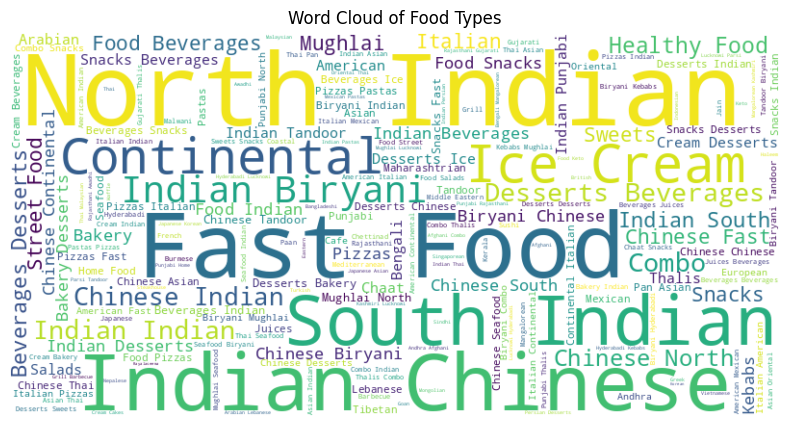

In [ ]:
from wordcloud import WordCloud

text = " ".join(df["Food type"].dropna())  # Combine all food types
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Food Types")
plt.show()


In [ ]:
import pickle

# Save the enhanced cosine similarity matrix
with open("cosine_similarity_model.pkl", "wb") as file:
    pickle.dump(cosine_sim_enhanced, file)

print("cosine_similarity_model.pkl saved successfully!")


cosine_similarity_model.pkl saved successfully!


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assume 'scaler' was used earlier to scale 'Price' and 'Avg ratings'
scaler = StandardScaler()
scaler.fit(df[['Price', 'Avg ratings']])

# Save the scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("scaler.pkl saved successfully!")


scaler.pkl saved successfully!


In [ ]:
from google.colab import files

files.download("cosine_similarity_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import pickle

# # # # Load the cosine similarity model
# try:
#     with open("cosine_similarity_model.pkl", "rb") as file:
#         cosine_sim_enhanced = pickle.load(file)
#     print("Cosine similarity model loaded successfully!")
# except Exception as e:
#     print("Error loading cosine similarity model:", e)

# # Load the scaler
# try:
#     with open("scaler.pkl", "rb") as file:
#         scaler = pickle.load(file)
#     print("Scaler loaded successfully!")
# except Exception as e:
#     print("Error loading scaler:", e)


Cosine similarity model loaded successfully!
Scaler loaded successfully!


KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv('swiggy.csv')

# Fill missing values (if any)
df.fillna("", inplace=True)

# Convert food type into numerical form using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
food_type_matrix = tfidf_vectorizer.fit_transform(df['Food type'])

# Scale numerical features (Price & Avg Ratings)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Price', 'Avg ratings']])

# Combine all features (TF-IDF + Scaled Numeric)
combined_features = np.hstack((scaled_features, food_type_matrix.toarray()))

# Train KNN model
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(combined_features)

# Function to get recommendations using KNN
def get_knn_recommendations(restaurant_name, top_n=5):
    if restaurant_name not in df['Restaurant'].values:
        return []  # Return empty list if restaurant not found

    index = df[df['Restaurant'] == restaurant_name].index[0]  # Find index
    distances, indices = knn.kneighbors([combined_features[index]], n_neighbors=top_n+1)

    recommendations = []
    for idx in indices.flatten()[1:]:  # Skip first index (self)
        recommendations.append({
            "name": df.iloc[idx]["Restaurant"],
            "address": df.iloc[idx]["Address"]
        })

    return recommendations

# Example usage:
print(get_knn_recommendations("Tandoor Hut"))


[{'name': 'Taj Mughalai', 'address': 'Purasawalkam - Taj Mughalai'}, {'name': 'Anil Wine N Dine', 'address': 'Kurla'}, {'name': 'Tandoor Hut', 'address': '5Th Block'}, {'name': 'Erode Amman Mess', 'address': 'Annanagar'}, {'name': 'Salem Rr Restaurant', 'address': 'Nungambakkam'}]


In [ ]:
from sklearn.metrics import precision_score

def precision_at_k(y_true, y_pred, k=5):
    """
    Computes Precision@K
    y_true: List of actual relevant restaurants
    y_pred: List of recommended restaurants
    k: Number of recommendations to consider
    """
    y_pred = y_pred[:k]  # Consider only top K recommendations
    hits = len(set(y_true) & set(y_pred))  # Count correct matches
    return hits / k if k > 0 else 0

# Example Usage:
actual_relevant = ["Restaurant A", "Restaurant B", "Restaurant C"]
predicted_knn = ["Restaurant A", "Restaurant D", "Restaurant B", "Restaurant E", "Restaurant F"]

precision_k = precision_at_k(actual_relevant, predicted_knn, k=5)
print(f"Precision@5 for KNN: {precision_k}")


Precision@5 for KNN: 0.4


In [ ]:
def recall_at_k(y_true, y_pred, k=5):
    """
    Computes Recall@K
    y_true: List of actual relevant restaurants
    y_pred: List of recommended restaurants
    k: Number of recommendations to consider
    """
    y_pred = y_pred[:k]  # Consider only top K recommendations
    hits = len(set(y_true) & set(y_pred))  # Count correct matches
    return hits / len(y_true) if len(y_true) > 0 else 0

# Example Usage:
recall_k = recall_at_k(actual_relevant, predicted_knn, k=5)
print(f"Recall@5 for KNN: {recall_k}")


Recall@5 for KNN: 0.6666666666666666
